In [2]:
from init import *

In [3]:
matplotlib.rc('figure', figsize=(15, 10))

In [5]:
from src.loaded_files import rotor_swept_area

# Sensitivity analysis BIAS correction

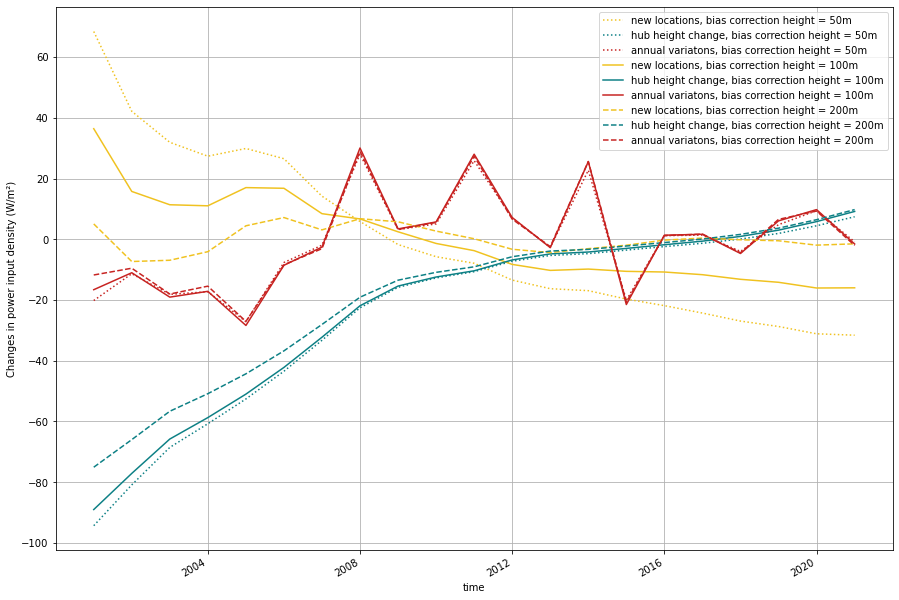

In [17]:
styles = ':', '-', '--'
heights = 50, 100, 200
colors = TURBINE_COLORS[1], TURBINE_COLORS[3], TURBINE_COLORS[4]

for bias_correction_height, style in zip(heights, styles):
    p_in = load_p_in(bias_correction_height=bias_correction_height)
    p_in_avgwind = load_p_in(bias_correction_height=bias_correction_height, avgwind=True)
    p_in_avgwind_refheight = load_p_in(bias_correction_height=bias_correction_height, avgwind=True, refheight=True)

    (1e9 * ((p_in_avgwind_refheight/rotor_swept_area) - (p_in_avgwind_refheight/rotor_swept_area).mean())).plot(
        color=colors[0], linestyle=style, label=f"new locations, bias correction height = {bias_correction_height}m")
    (1e9 * (p_in_avgwind - p_in_avgwind_refheight)/rotor_swept_area).plot(
        color=colors[1], linestyle=style, label=f"hub height change, bias correction height = {bias_correction_height}m")
    (1e9 * (p_in - p_in_avgwind)/rotor_swept_area).plot(
        color=colors[2], linestyle=style, label=f"annual variatons, bias correction height = {bias_correction_height}m")

plt.grid();
plt.ylabel('Change in input power density (W/m²)')
plt.legend();